In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def xor(a, b):
    return int((a > 0) ^ (b > 0))

def or_(a, b):
    return int((a > 0) or (b > 0))

def generate(N=1000):
    return np.random.uniform(-1, 1, (N, 2))

X = generate()
yxor = [xor(*row) for row in X]
y_or = [or_(*row) for row in X]

def plot(X, y):
    data = {}
    data['x'] = X[:,0]
    data['y'] = X[:,1]
    data['class'] = y
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="x", y="y",
        style="class", hue="class",
        data=data,
        legend="full",
        alpha=0.7
    )

OR


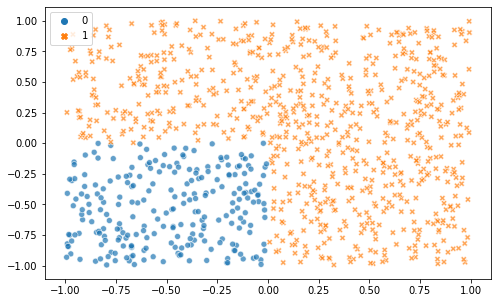

XOR


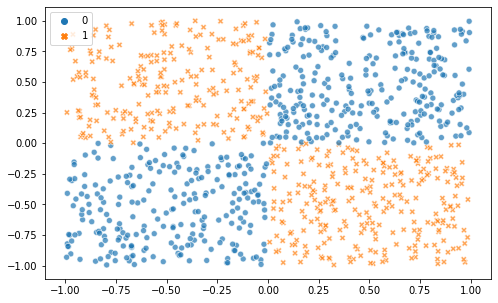

In [2]:
import seaborn as sns

print("OR")
plot(X, y_or)
plt.show()
print("XOR")
plot(X, yxor)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1score=0.9413298565840938
z=(4.5, 4.4, 2.8) * (x, y, 1)
OR


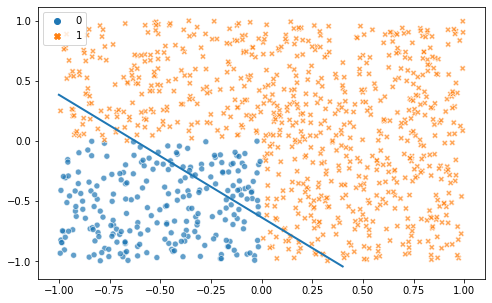

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(random_state=0).fit(X, y_or)
y_predict = clf.predict(X)
print(f'F1score={f1_score(y_or, y_predict)}')
b, u, v = clf.intercept_[0], *clf.coef_[0]
print(f"z=({u:.2}, {v:.2}, {b:.2}) * (x, y, 1)")
# decision boundary
# x * u + y * v + b * 1 = 0

def f(x):
    return -(x * u + b * 1) / v

print("OR")
plot(X, y_or)
plt.plot([-1, 0.4], [f(-1), f(0.4)], linewidth=2)
plt.show()

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1score=0.4992947813822285
z=(0.067, -0.14, -0.078) * (x, y, 1)
XOR


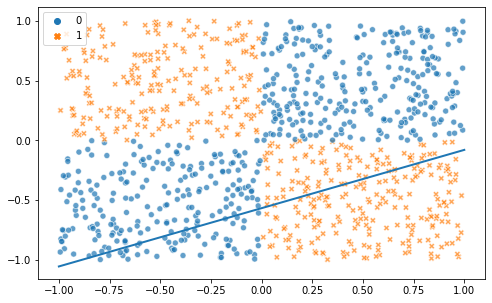

In [7]:
clf = LogisticRegression(random_state=0).fit(X, yxor)
y_predict = clf.predict(X)
print(f'F1score={f1_score(yxor, y_predict)}')
b, u, v = clf.intercept_[0], *clf.coef_[0]
print(f"z=({u:.2}, {v:.2}, {b:.2}) * (x, y, 1)")
# decision boundary
# x * u + y * v + b * 1 = 0
def f(x):
    return -(x * u + b * 1) / v

print("XOR")
plot(X, yxor)
plt.plot([-1, 1], [f(-1), f(1)], linewidth=2)
plt.show()

# TODO #

Use this initial example and study the output classes. Focus on 2 parameters: `activation` and `hidden_layer_sizes`.
- First fix `activation='identity'`. Try different `hidden_layer_sizes`: `(2,)`-`(4,)`; `(100,)`; `(100, 100)`; `(2,2)`; `(2,2,2)`. How did it work? Why? Post your comments to a chat.
- Then fix `activation='relu'`. Try different `hidden_layer_sizes`: `(2,)`-`(4,)`; `(2,2)`; `(3,2)`; `(2,2,2)`. Is it successfull? For which parameters?
- In the end, fix `activation='logistic'`. Try different `hidden_layer_sizes`: `(2,)`-`(4,)`; `(2,2)`; `(3,2)`; `(2,2,2)`. Where did it perform better, than `relu`?


F1score = 0.5049088359046283
XOR predicted by ANN


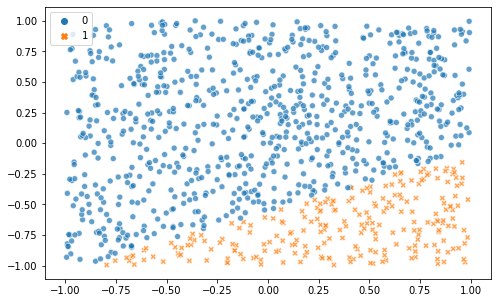

In [8]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    solver='lbfgs',    # https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
                       # or sgd of adam
    alpha=1e-5,        # regularization term
    
    activation='identity', # 'relu', 'identity', 'logistic', 'tanh'
    hidden_layer_sizes=(2,),

    random_state=7,    # seed for random generator
    verbose=True,
    max_iter=1000,      # use this to tune the time relatively
)
clf.fit(X, yxor)

y_predict = clf.predict(X)
print(f'F1score = {f1_score(yxor, y_predict)}')

print("XOR predicted by ANN")
plot(X, y_predict)

# clf.coefs_, clf.intercepts_